# Análisis de datos LoveMatch

Previo a realizar cualquier descricpción estadística, es necesario manipular los datos obtenidos en el modelo y agente ya que se presenta un problema de pérdida de información.

En primer lugar, al momento de realizar el match, las parejas salen del modelo y del grid. Sin embargo, se llevan con ellos toda la información asociada a sus características. Por lo tanto, la información que necesitamos para comparar entre individuos se va con ellos. 

Sin embargo, es posible recuperar la información sobre quién se emparejó y quién no con la información de la paciencia (time_to_critical) así como la del número de steps sin encontrar pareja (sojourn), si tomamos en cuenta la diferencia entre estas dos variables podemos distinguir quienes dejaron el modelo (time - soj = 1) de aquellos que realizaron su match en su intervalo de paciencia individual (time- - soj != 1).

Para estimar quienes son parejas y quienes se fueron sin match, es necesario agrupar los datos, obtener el valor máximo de sojourn y compararlo con el tiempo crítico. Una vez obtenido esta serie, la agregamos al DataFrame final y con este, ya es posible filtrar quienes tuvieron pareja y quienes no. Con esta información tomada en cuenta, es posible realizar estadística descriptiva para cada grupo.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option('display.max_rows',5279)

In [ ]:
##### Importar bases de datos para agentes y el modelo ########

In [5]:
info_agentes = pd.read_csv("a_unbal.csv")

In [6]:
info_modelo = pd.read_csv("m_unbal.csv")

In [134]:
#### Con soj y time encontramos los datos sobre la paciencia y el tiempo máximo de esta por agente (los datos se agruparon) #####

In [7]:
soj = info_agentes.groupby('myid')['sojourn'].max()  

In [8]:
time = info_agentes.groupby('myid')['time_to_critical'].max()

In [ ]:
### La diferencia en el tiempo nos dice si se emparejaron o no. Si es igual a 1, entonces el tiempo que estuvo es igual a su tiempo máximo de espera. #####

In [9]:
par = time - soj

In [96]:
#### Ahora agrupamos el dataframe por agentes para obtener características en un periodo fijo ####

In [10]:
data = info_agentes.groupby(['myid'])[['gender','wealth', 'beauty','desired_beauty','desired_wealth','time_to_critical']]

In [ ]:
#### convertimos el objeto de grouby a dataframe para futuras manipulaciones ####

In [11]:
data = data.first()

In [ ]:
#### agregamos la serie obtenida al dataframe de agentes para poder separar a los individuos emparejados de los solteros#####

In [12]:
df = data.assign(estatus= par) 

In [ ]:
#### Creamos filtros para los distintos tipos de estatus ####

In [13]:
is_single = df['estatus'] == 1

In [14]:
is_match = df['estatus'] != 1

In [ ]:
###### Creamos dos dataframes separados por estatus, una vez aplicado el filtro #######

In [16]:
solteros = df[is_single]

In [17]:
parejas = df[is_match]

In [ ]:
####### ESTADISTICA DESCRIPTIVA #######

In [18]:
solteros.describe()

,gender,wealth,beauty,desired_beauty,desired_wealth,time_to_critical,estatus
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.0
mean,0.696078,1.707084,1.652443,1.707118,1.744001,20.127451,1.0
std,0.461081,0.541308,0.522446,0.487887,0.544066,6.021589,0.0
min,0.000000,0.795783,0.743569,0.626570,0.788579,10.000000,1.0
25%,0.000000,1.335337,1.292707,1.387721,1.365276,15.000000,1.0
50%,1.000000,1.607849,1.561660,1.643528,1.633229,19.000000,1.0
75%,1.000000,1.987195,1.924038,1.974167,2.082559,25.000000,1.0
max,1.000000,3.964984,3.811496,3.868437,3.762512,30.000000,1.0


In [19]:
parejas.describe()

,gender,wealth,beauty,desired_beauty,desired_wealth,time_to_critical,estatus
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,0.500000,1.945188,1.705131,1.548287,1.536422,19.547619,15.357143
std,0.506061,0.611405,0.440931,0.494822,0.440972,5.090414,7.028935
min,0.000000,1.027343,0.924142,0.801422,0.779025,10.000000,3.000000
25%,0.000000,1.474484,1.396904,1.292969,1.228714,16.250000,10.000000
50%,0.500000,1.847478,1.776256,1.464403,1.471964,19.500000,15.000000
75%,1.000000,2.264743,1.994533,1.732449,1.778594,22.000000,20.000000
max,1.000000,4.137917,2.696229,3.531391,2.527877,30.000000,29.000000


In [20]:
solteros.groupby('gender')['estatus'].count()

gender
0     62
1    142
Name: estatus, dtype: int64

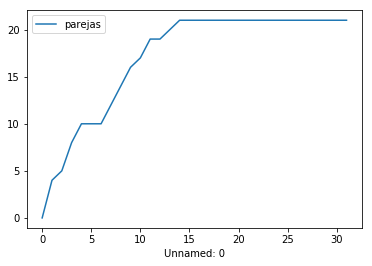

In [30]:
info_modelo.plot(x = 'Unnamed: 0', y = 'parejas')

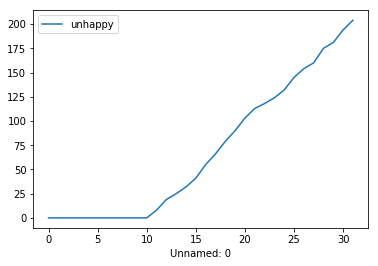

In [31]:
info_modelo.plot(x = 'Unnamed: 0', y = 'unhappy')

C:\Users\edari\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


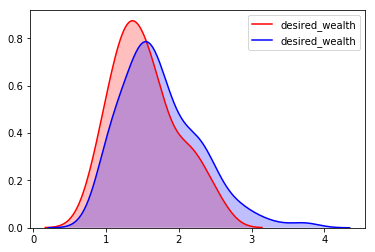

In [22]:
p1 = sns.kdeplot(parejas['desired_wealth'], shade= True, color = 'r')
p2 = sns.kdeplot(solteros['desired_wealth'], shade = True, color = 'b')


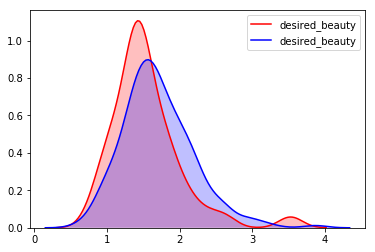

In [23]:
p3 = sns.kdeplot(parejas['desired_beauty'], shade = True, color = 'r')
p4 = sns.kdeplot(solteros['desired_beauty'], shade = True, color = 'b')

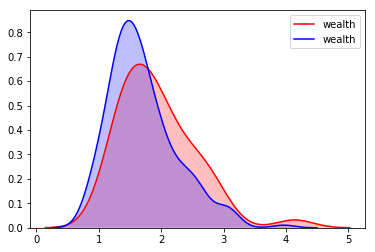

In [24]:
p5 = sns.kdeplot(parejas['wealth'], shade= True, color = 'r')
p6 = sns.kdeplot(solteros['wealth'], shade = True, color = 'b')


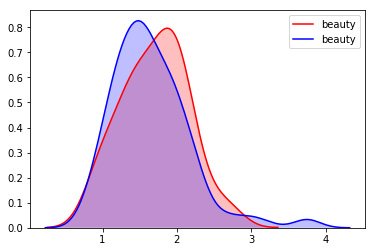

In [25]:
p7 = sns.kdeplot(parejas['beauty'], shade = True, color = 'r')
p8 = sns.kdeplot(solteros['beauty'], shade = True, color = 'b')

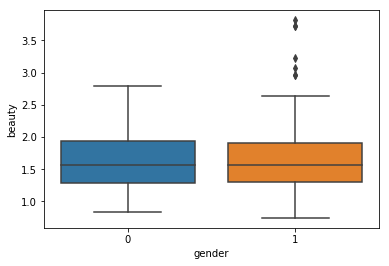

In [26]:
 sns.boxplot(x="gender", y="beauty", data=solteros)

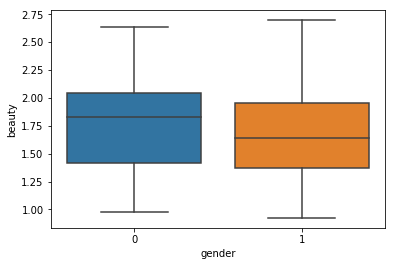

In [27]:
 sns.boxplot(x="gender", y="beauty", data=parejas)

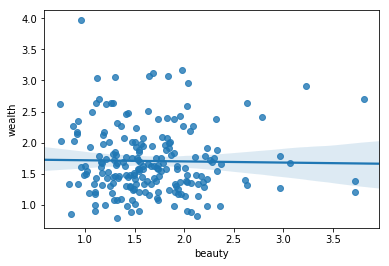

In [28]:
 sns.regplot(x="beauty",
 y="wealth",
 data=solteros)

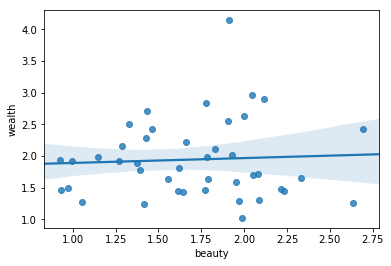

In [29]:
 sns.regplot(x="beauty",
 y="wealth",
 data=parejas)